# Regular expressions & word tokenization

* 這堂課會學到 basics of NLP. 
  * Topic identification. 
  * Text classification

## Intro to regular expression

* 正規表達式可以用在哪？  
  * 從一份文件中，找出所有的 web links. 
  * parse email addresses. 
  * remove/replace unwanted characters

* 來點常用的regullar expression  
  * `\d`: 找 digits (數字 0 ~ 9)  
  * `\s`: 找 空白  
  * `\S`: 找 非空白  
  * `\w`: 找 word
  * `.`: 找任意字元
* 特殊符號：  
  * `?` 表示前面的字要出現 0 次 or 1 次 (e.g. `r"colou?r"`，就表示 colour 或 color 都可). 
  * `+` 表示前面的字出現 1 次以上 (e.g. `\s+` 就表示一個或多個空白, `\w+` 就是找一個或多個 word). 
  * `*` 表示前面的字出現 0 次以上  
  * `^` 表示開頭 (e.g. `r"^a"` 就是抓 a 開頭的字). 
  * `$` 表示結尾 (e.g. `r"e$"` 就是抓 e 結尾的字). 
  * `|` 代表 "或"，例如 `r"\s+|,"` 表示我要找空白或逗號
  * `()` 可定義一個 group. 
  * `[]` 可以想成"或"，裡面的element全都是用"或"來連接，常用的包括：  
    * `[A-Z]+`: A 或 B 或 ... 或 Z 都算 match 到。那要 match 幾次？ "+" -> 有幾次就 match 幾次
    * `[a-z]+`: a 或 b 或 ... 或 z 都算 match 到 
    * `[A-Za-z]+`: A 或 B 或 ... 或 Z 或 a 或 b ... 或 z 
    * `[A-Za-z\-\.]+`: 同上，或 `-` 或 `.` 
    * `[0-9]`: 0 或 1 或 ... 或 9。 與 `"\d"` 同義  

* 要實作的話，可用 python 的 `re` 這個 module，裡面包括以下幾個 methods:  
  * `.split()`: 用你提供的 regex ，把一個字串切成好幾塊. 
  * `.findall()`: 找出字串中出現的 patterns. 
  * `.search()`: search for a pattern. (e.g. "abcde", "abc", "ccabc" 這三個字串都 `search()` 的到 "abc" 這個 pattern。)
  * `.match()`: 從第一個字母開始 matching，找出符合的 (e.g. 可從 "abcde" 或 "abc" 這兩個字串中， `match()` 到 "abc" 這個 pattern。但無法從 "ccabc" 這個字串 `match()` 到 "abc" 這個pattern)

* 特別注意，寫 regex 的 pattern 時，都會用 `r"abv"` 這種寫法。也就是在字串前加上 `r`。
* `r` 是 raw 的縮寫，用意是告訴 python ，我後面寫的字串，是 raw string，不要幫我搞東搞西. 
* 舉例來說，我如果寫 `r"a\nb"`，那就是要 python 幫我找 "a\nb" 這個字串。但如果你前面沒加上 `r`，他看到 "\n"，會自動翻譯成換行符號，而不是純字串。

* 來做些練習吧：

In [16]:
import re
my_string = "Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?"

* 上面定義了一個字串，現在來練習：

### `re.split()`. 

* 我想依照空白，來把 `my_string` 切開，就可以做到斷詞了。

In [22]:
print(my_string)
spaces = r"\s+"
print(re.split(spaces, my_string))

Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?
["Let's", 'write', 'RegEx!', "Won't", 'that', 'be', 'fun?', 'I', 'sure', 'think', 'so.', 'Can', 'you', 'find', '4', 'sentences?', 'Or', 'perhaps,', 'all', '19', 'words?']


* 如果我想要斷句，那看來結尾是 `!` 或 `?` 或 `.` ，加上空白，就都是結尾的意思：

In [23]:
print(my_string)
sentence_endings = r"[.?!]\s+"
print(re.split(sentence_endings, my_string))

Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?
["Let's write RegEx", "Won't that be fun", 'I sure think so', 'Can you find 4 sentences', 'Or perhaps, all 19 words?']


### `re.findall()`

* 我如果想找字串裡的第一個字(有大寫的)，可以這樣做：

In [24]:
print(my_string)
capitalized_words = r"[A-Z]\w+"
print(re.findall(capitalized_words, my_string))

Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?
['Let', 'RegEx', 'Won', 'Can', 'Or']


* 找出所有包含數字的字串：  

In [27]:
print(my_string)
digits = r"[0-9]+"
print(re.findall(digits, my_string))

Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?
['4', '19']


### `re.search()`. 

In [14]:
re.search("abc", "abcde")

<re.Match object; span=(0, 3), match='abc'>

In [15]:
re.search("abc", "ccabc")

<re.Match object; span=(2, 5), match='abc'>

### `re.match()`. 

In [40]:
mat_res = re.match('abc', 'abcde')

In [43]:
mat_res.start()

0

In [42]:
mat_res.end()

3

In [46]:
"abcde"[mat_res.start():mat_res.end()]

'abc'

## tokenization

* 先安裝 nltk，以及對應的

In [33]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/hanklee/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

* 會把 punkt 裝到以下路徑 (預設會裝在第一個路徑下)：  

- Searched in:
    - '/Users/hanklee/nltk_data'  
    - '/Volumes/GoogleDrive/我的雲端硬碟/0. codepool_python/nlp_tutorial/nlp_env/nltk_data'  
    - '/Volumes/GoogleDrive/我的雲端硬碟/0. codepool_python/nlp_tutorial/nlp_env/share/nltk_data'  
    - '/Volumes/GoogleDrive/我的雲端硬碟/0. codepool_python/nlp_tutorial/nlp_env/lib/nltk_data'  
    - '/usr/share/nltk_data'  
    - '/usr/local/share/nltk_data'  
    - '/usr/lib/nltk_data'  
    - '/usr/local/lib/nltk_data'  
    - ''  

### 範例字串

* 假設我們從網路上下載了一個劇本，可以存成以下的字串：

In [28]:
scene_one = "SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!  [clop clop clop] \nSOLDIER #1: Halt!  Who goes there?\nARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!\nSOLDIER #1: Pull the other one!\nARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.\nSOLDIER #1: What?  Ridden on a horse?\nARTHUR: Yes!\nSOLDIER #1: You're using coconuts!\nARTHUR: What?\nSOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.\nARTHUR: So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\nSOLDIER #1: Where'd you get the coconuts?\nARTHUR: We found them.\nSOLDIER #1: Found them?  In Mercea?  The coconut's tropical!\nARTHUR: What do you mean?\nSOLDIER #1: Well, this is a temperate zone.\nARTHUR: The swallow may fly south with the sun or the house martin or the plover may seek warmer climes in winter, yet these are not strangers to our land?\nSOLDIER #1: Are you suggesting coconuts migrate?\nARTHUR: Not at all.  They could be carried.\nSOLDIER #1: What?  A swallow carrying a coconut?\nARTHUR: It could grip it by the husk!\nSOLDIER #1: It's not a question of where he grips it!  It's a simple question of weight ratios!  A five ounce bird could not carry a one pound coconut.\nARTHUR: Well, it doesn't matter.  Will you go and tell your master that Arthur from the Court of Camelot is here.\nSOLDIER #1: Listen.  In order to maintain air-speed velocity, a swallow needs to beat its wings forty-three times every second, right?\nARTHUR: Please!\nSOLDIER #1: Am I right?\nARTHUR: I'm not interested!\nSOLDIER #2: It could be carried by an African swallow!\nSOLDIER #1: Oh, yeah, an African swallow maybe, but not a European swallow.  That's my point.\nSOLDIER #2: Oh, yeah, I agree with that.\nARTHUR: Will you ask your master if he wants to join my court at Camelot?!\nSOLDIER #1: But then of course a-- African swallows are non-migratory.\nSOLDIER #2: Oh, yeah...\nSOLDIER #1: So they couldn't bring a coconut back anyway...  [clop clop clop] \nSOLDIER #2: Wait a minute!  Supposing two swallows carried it together?\nSOLDIER #1: No, they'd have to have it on a line.\nSOLDIER #2: Well, simple!  They'd just use a strand of creeper!\nSOLDIER #1: What, held under the dorsal guiding feathers?\nSOLDIER #2: Well, why not?\n"

### sentenc tokenizer

* 現在我們想把這個劇本，斷成多個句子：

In [36]:
sentences = sent_tokenize(scene_one)
sentences

['SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!',
 '[clop clop clop] \nSOLDIER #1: Halt!',
 'Who goes there?',
 'ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.',
 'King of the Britons, defeator of the Saxons, sovereign of all England!',
 'SOLDIER #1: Pull the other one!',
 'ARTHUR: I am, ...  and this is my trusty servant Patsy.',
 'We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.',
 'I must speak with your lord and master.',
 'SOLDIER #1: What?',
 'Ridden on a horse?',
 'ARTHUR: Yes!',
 "SOLDIER #1: You're using coconuts!",
 'ARTHUR: What?',
 "SOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.",
 'ARTHUR: So?',
 "We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\nSOLDIER #1: Where'd you get the coconuts?",
 'ARTHUR: We found them.',
 'SOLDIER #1: Found them?',
 'In Mercea?',
 "The coconut's tropic

### word tokenizer

* 假如我想抓出第三句台詞，來做斷詞，可以這樣做：

In [37]:
print(sentences[3])

print(word_tokenize(sentences[3]))

ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.
['ARTHUR', ':', 'It', 'is', 'I', ',', 'Arthur', ',', 'son', 'of', 'Uther', 'Pendragon', ',', 'from', 'the', 'castle', 'of', 'Camelot', '.']


* 假如我想對整個劇本做斷詞，然後找出所有 unique 的文字，可以這樣做：

In [38]:
unique_tokens = set(word_tokenize(scene_one))
print(unique_tokens)

{"'re", 'times', 'dorsal', 'grip', 'Yes', 'or', 'Patsy', 'So', 'martin', 'they', ':', 'Pull', 'Whoa', 'coconuts', 'its', 'interested', 'not', 'you', 'Found', 'Britons', 'They', 'do', 'Court', 'winter', 'back', 'will', 'where', 'all', 'KING', 'are', 'coconut', 'Halt', 'using', ',', 'use', 'creeper', "'ve", 'since', 'Please', 'is', 'point', 'carrying', 'simple', 'just', 'may', 'through', 'there', 'get', 'Not', 'in', 'length', 'But', 'line', 'ounce', 'tropical', 'maybe', 'Wait', 'King', 'tell', 'temperate', 'join', "'s", 'course', 'plover', 'one', 'migrate', 'my', '.', 'Saxons', 'fly', 'our', 'together', 'SCENE', 'sun', 'velocity', 'Am', 'but', 'got', 'wings', 'this', 'five', 'No', 'trusty', 'land', 'court', 'climes', 'go', 'agree', 'Supposing', 'We', 'servant', 'who', 'master', 'In', 'European', 'Where', 'yet', 'grips', 'weight', 'ARTHUR', 'That', 'horse', 'swallow', 'goes', 'from', 'am', 'Oh', 'every', 'Listen', 'search', 'must', 'breadth', 'be', 'non-migratory', 'seek', 'Well', 'feathe

### practice with regex and `re.search()`/`re.match()`

* 我如果想找到，這個劇本裡面，第一次出現 "coconuts" 的位子，我可以這樣做：

In [48]:
search_res = re.search("coconuts", scene_one)
print(search_res.start(), search_res.end())

580 588


* 可以看到，在 580~588 的位子，出現過 coconuts

In [49]:
scene_one[search_res.start():search_res.end()]

'coconuts'

* 我也可以找，哪些字被中括號包起來？

In [50]:
pattern1 = r"\[.*\]"
print(re.search(pattern1, scene_one))

<re.Match object; span=(9, 32), match='[wind] [clop clop clop]'>


* 可以看到，他告訴你在 9~32 的位置，可以查到 `'[wind] [clop clop clop]'`

* 再來，我們看一下第四個句子：

In [51]:
print(sentences[3])

ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.


* 我如果想知道，這個句子是誰要講的台詞，那我就是想找 `":"` 前的字，那我可以這樣做：

In [52]:
pattern2 = r"[\w\s]+:" # 是 word 或 空格都可以，一路 match (因為有 `+`)，直到 `:` 停止
print(re.match(pattern2, sentences[3]))

<re.Match object; span=(0, 7), match='ARTHUR:'>


* 可以看到，找出這句話是 ARTHUR 要說的

### regex tokenizer

* 我們在斷詞的時候，也可以用自己指定的 regex 來斷。
* 例如下句：

In [53]:
my_string = "SOLDIER #1: Found them? In Mercea? The coconut's tropical!"

* 我在斷詞的時候，希望找出來的詞，包括：  
  * 一般的文字: e.g. SOLIDER, Found, them, ... 這些。
  * `#1` 這種. 
  * 問號. 
  * 驚嘆號. 
* 其他我沒提到的，不要幫我斷出來。  
* 那我可以這樣做：

In [57]:
from nltk.tokenize import regexp_tokenize

In [58]:
regexp_tokenize(my_string, r"(\w+|#\d|\?|!)") # 我要找 任意文字 或 井號加數字 或問號 或驚嘆號 

['SOLDIER',
 '#1',
 'Found',
 'them',
 '?',
 'In',
 'Mercea',
 '?',
 'The',
 'coconut',
 's',
 'tropical',
 '!']

### TweetTokenizer

* 來看看 tweeter 上，3篇 tweet 的長相：

In [63]:
tweets = [
    'This is the best #nlp exercise ive found online! #python',
    '#NLP is super fun! <3 #learning',
    'Thanks @datacamp :) #nlp #python'
]

In [64]:
from nltk.tokenize import regexp_tokenize, TweetTokenizer

* 如果，我想抓出第一篇 tweet 上的所有 hashtag，我可以這樣做：

In [65]:
pattern1 = r"#\w+"
hashtags = regexp_tokenize(tweets[0], pattern1)
print(hashtags)

['#nlp', '#python']


* 如果我想找出第三篇 tweet 的 mentions (e.g. `@DataCamp`) 和 hashtags (e.g. `#nlp`)，我可以這樣做：

In [66]:
pattern2 = r"([#@]\w+)"
mentions_hashtags = regexp_tokenize(tweets[-1], pattern2)
print(mentions_hashtags)

['@datacamp', '#nlp', '#python']


* 由上面兩個練習，已經可以發現， mentions 和 hashtags 都被我視為一個詞。所以，斷詞的時候，不只要斷出 word，還要斷出 mentions 和 hashtags. 
* 那我可以這樣做斷詞

In [73]:
pattern3 = r"[#@]?\w+" # `?` 表示，前面的東西出現 0 次 or 1 次
[regexp_tokenize(t, pattern3) for t in tweets]

[['This',
  'is',
  'the',
  'best',
  '#nlp',
  'exercise',
  'ive',
  'found',
  'online',
  '#python'],
 ['#NLP', 'is', 'super', 'fun', '3', '#learning'],
 ['Thanks', '@datacamp', '#nlp', '#python']]

* 但因為 tweeter 的這種特性很常見，所以已經幫你做好一個 class (`TweetTokenizer`) 可以用了:

In [74]:
tknzr = TweetTokenizer()
all_tokens = [tknzr.tokenize(t) for t in tweets]
all_tokens

[['This',
  'is',
  'the',
  'best',
  '#nlp',
  'exercise',
  'ive',
  'found',
  'online',
  '!',
  '#python'],
 ['#NLP', 'is', 'super', 'fun', '!', '<3', '#learning'],
 ['Thanks', '@datacamp', ':)', '#nlp', '#python']]

### Non-ascii tokenization

* 如果要對 non-ascii (e.g. 德文) 做 tokenization，可以這樣做  
* 先來個德文+emoji的字串:

In [79]:
german_text = "Wann gehen wir Pizza essen? 🍕 Und fährst du mit Über? 🚕"

* 直接做斷詞，就跟之前一樣：

In [80]:
all_words = word_tokenize(german_text)
print(all_words)

['Wann', 'gehen', 'wir', 'Pizza', 'essen', '?', '🍕', 'Und', 'fährst', 'du', 'mit', 'Über', '?', '🚕']


* 如果要對首字大寫的字做斷詞，可以這樣做：

In [81]:
capital_words = r"[A-ZÜ]\w+" # 特別注意，多加了德文的 `Ü` 在裡面
print(regexp_tokenize(german_text, capital_words))

['Wann', 'Pizza', 'Und', 'Über']


* 如果要找出 emoji 的話，可以這樣做 (附上 emoji 的 unicode ranges)：

In [82]:
# Tokenize and print only emoji
emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
print(regexp_tokenize(german_text, emoji))

['🍕', '🚕']


### chart practice

* 這邊來做個練習  
* 首先我們有個劇本的字串，裡面包涵每個角色的台詞，如下：

In [83]:
holy_grail = "SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!  [clop clop clop] \nSOLDIER #1: Halt!  Who goes there?\nARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!\nSOLDIER #1: Pull the other one!\nARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.\nSOLDIER #1: What?  Ridden on a horse?\nARTHUR: Yes!\nSOLDIER #1: You're using coconuts!\nARTHUR: What?\nSOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.\nARTHUR: So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\nSOLDIER #1: Where'd you get the coconuts?\nARTHUR: We found them.\nSOLDIER #1: Found them?  In Mercea?  The coconut's tropical!\nARTHUR: What do you mean?\nSOLDIER #1: Well, this is a temperate zone.\nARTHUR: The swallow may fly south with the sun or the house martin or the plover may seek warmer climes in winter, yet these are not strangers to our land?\nSOLDIER #1: Are you suggesting coconuts migrate?\nARTHUR: Not at all.  They could be carried.\nSOLDIER #1: What?  A swallow carrying a coconut?\nARTHUR: It could grip it by the husk!\nSOLDIER #1: It's not a question of where he grips it!  It's a simple question of weight ratios!  A five ounce bird could not carry a one pound coconut.\nARTHUR: Well, it doesn't matter.  Will you go and tell your master that Arthur from the Court of Camelot is here.\nSOLDIER #1: Listen.  In order to maintain air-speed velocity, a swallow needs to beat its wings forty-three times every second, right?\nARTHUR: Please!\nSOLDIER #1: Am I right?\nARTHUR: I'm not interested!\nSOLDIER #2: It could be carried by an African swallow!\nSOLDIER #1: Oh, yeah, an African swallow maybe, but not a European swallow.  That's my point.\nSOLDIER #2: Oh, yeah, I agree with that.\nARTHUR: Will you ask your master if he wants to join my court at Camelot?!\nSOLDIER #1: But then of course a-- African swallows are non-migratory.\nSOLDIER #2: Oh, yeah...\nSOLDIER #1: So they couldn't bring a coconut back anyway...  [clop clop clop] \nSOLDIER #2: Wait a minute!  Supposing two swallows carried it together?\nSOLDIER #1: No, they'd have to have it on a line.\nSOLDIER #2: Well, simple!  They'd just use a strand of creeper!\nSOLDIER #1: What, held under the dorsal guiding feathers?\nSOLDIER #2: Well, why not?\nSCENE 2: [thud] [clang] \nCART-MASTER: Bring out your dead!  [clang] Bring out your dead!  [clang] Bring out your dead!  [clang] Bring out your dead!  [clang] Bring out your dead!  [cough cough...] [clang] [... cough cough] Bring out your dead!  [clang] Bring out your dead!  [clang] Bring out your dead!  Ninepence.  [clang] Bring out your dead!  [clang] Bring out your dead!  [clang] Bring out...  [rewr!] ... your dead!  [rewr!] [clang] Bring out your dead!\nCUSTOMER: Here's one.\nCART-MASTER: Ninepence.\nDEAD PERSON: I'm not dead!\nCART-MASTER: What?\nCUSTOMER: Nothing.  Here's your ninepence.\nDEAD PERSON: I'm not dead!\nCART-MASTER: 'Ere.  He says he's not dead!\nCUSTOMER: Yes he is.\nDEAD PERSON: I'm not!\nCART-MASTER: He isn't?\nCUSTOMER: Well, he will be soon.  He's very ill.\nDEAD PERSON: I'm getting better!  \nCUSTOMER: No you're not.  You'll be stone dead in a moment.\nCART-MASTER: Oh, I can't take him like that.  It's against regulations.\nDEAD PERSON: I don't want to go on the cart!\nCUSTOMER: Oh, don't be such a baby.\nCART-MASTER: I can't take him.\nDEAD PERSON: I feel fine!\nCUSTOMER: Well, do us a favor.\nCART-MASTER: I can't.\nCUSTOMER: Well, can you hang around a couple of minutes?  He won't be long.\nCART-MASTER: No, I've got to go to the Robinson's.  They've lost nine today.\nCUSTOMER: Well, when's your next round?\nCART-MASTER: Thursday.\nDEAD PERSON: I think I'll go for a walk.\nCUSTOMER: You're not fooling anyone you know.  Look, isn't there something you can do?\nDEAD PERSON: [singing] I feel happy...  I feel happy.  [whop] \nCUSTOMER: Ah, thanks very much.\nCART-MASTER: Not at all.  See you on Thursday.\nCUSTOMER: Right.  All right.  [howl] [clop clop clop] Who's that then?\nCART-MASTER: I dunno.  Must be a king.\nCUSTOMER: Why?\nCART-MASTER: He hasn't got shit all over him.\nSCENE 3: [thud] [King Arthur music] [thud thud thud] [King Arthur music stops] \nARTHUR: Old woman!\nDENNIS: Man!\nARTHUR: Man.  Sorry.  What knight live in that castle over there?\nDENNIS: I'm thirty-seven.\nARTHUR: I-- what?\nDENNIS: I'm thirty-seven.  I'm not old.\nARTHUR: Well, I can't just call you 'Man'.\nDENNIS: Well, you could say 'Dennis'.\nARTHUR: Well, I didn't know you were called 'Dennis'.\nDENNIS: Well, you didn't bother to find out, did you?\nARTHUR: I did say 'sorry' about the 'old woman', but from the behind you looked--\nDENNIS: What I object to is that you automatically treat me like an inferior!\nARTHUR: Well, I am king!\nDENNIS: Oh king, eh, very nice.  And how d'you get that, eh?  By exploiting the workers!  By 'anging on to outdated imperialist dogma which perpetuates the economic and social differences in our society.  If there's ever going to be any progress with the--\nWOMAN: Dennis, there's some lovely filth down here.  Oh!  How d'you do?\nARTHUR: How do you do, good lady.  I am Arthur, King of the Britons.  Who's castle is that?\nWOMAN: King of the who?\nARTHUR: The Britons.\nWOMAN: Who are the Britons?\nARTHUR: Well, we all are.  We are all Britons, and I am your king.\nWOMAN: I didn't know we had a king.  I thought we were an autonomous collective.\nDENNIS: You're fooling yourself.  We're living in a dictatorship.  A self-perpetuating autocracy in which the working classes--\nWOMAN: Oh, there you go, bringing class into it again.\nDENNIS: That's what it's all about.  If only people would hear of--\nARTHUR: Please, please good people.  I am in haste.  Who lives in that castle?\nWOMAN: No one live there.\nARTHUR: Then who is your lord?\nWOMAN: We don't have a lord.\nARTHUR: What?\nDENNIS: I told you.  We're an anarcho-syndicalist commune.  We take it in turns to act as a sort of executive officer for the week.\nARTHUR: Yes.\nDENNIS: But all the decision of that officer have to be ratified at a special bi-weekly meeting--\nARTHUR: Yes, I see.\nDENNIS: By a simple majority in the case of purely internal affairs,--\nARTHUR: Be quiet!\nDENNIS: But by a two-thirds majority in the case of more major--\nARTHUR: Be quiet!  I order you to be quiet!\nWOMAN: Order, eh?  Who does he think he is?  Heh.\nARTHUR: I am your king!\nWOMAN: Well, I didn't vote for you.\nARTHUR: You don't vote for kings.\nWOMAN: Well, how did you become king then?\nARTHUR: The Lady of the Lake, ... [angels sing] ... her arm clad in the purest shimmering samite, held aloft Excalibur from the bosom of the water signifying by Divine Providence that I, Arthur, was to carry Excalibur. [singing stops] That is why I am your king!\nDENNIS: Listen, strange women lying in ponds distributing swords is no basis for a system of government.  Supreme executive power derives from a mandate from the masses, not from some farcical aquatic ceremony.\nARTHUR: Be quiet!\nDENNIS: Well, but you can't expect to wield supreme executive power just 'cause some watery tart threw a sword at you!\nARTHUR: Shut up!\nDENNIS: I mean, if I went 'round saying I was an emperor just because some moistened bint had lobbed a scimitar at me, they'd put me away!\nARTHUR: Shut up, will you.  Shut up!\nDENNIS: Ah, now we see the violence inherent in the system.\nARTHUR: Shut up!\nDENNIS: Oh!  Come and see the violence inherent in the system!  Help, help!  I'm being repressed!\nARTHUR: Bloody peasant!\nDENNIS: Oh, what a give-away.  Did you hear that?  Did you hear that, eh?  That's what I'm on about.  Did you see him repressing me?  You saw it, didn't you\nSCENE 4: [King Arthur music] [music stops] \nBLACK KNIGHT: Aaagh!  [King Arthur music] [music stops] \nBLACK KNIGHT: Aaagh!\nGREEN KNIGHT: Ooh! [King Arthur music] [music stops] [stab] \nBLACK KNIGHT: Aagh!\nGREEN KNIGHT: Oh! [King Arthur music] Ooh! [music stops] \nBLACK KNIGHT: Aaagh! [clang] \nBLACK KNIGHT and GREEN KNIGHT: Agh!, oh!, etc.\nGREEN KNIGHT: Aaaaaah!  Aaaaaaaaah! [woosh] [BLACK KNIGHT kills GREEN KNIGHT] [thud] [scrape] \nBLACK KNIGHT: Umm! [clop clop clop] \nARTHUR: You fight with the strength of many men, Sir Knight. [pause] I am Arthur, King of the Britons. [pause] I seek the finest and the bravest knights in the land to join me in my court at Camelot. [pause] You have proved yourself worthy.  Will you join me? [pause] You make me sad.  So be it.  Come, Patsy.\nBLACK KNIGHT: None shall pass.\nARTHUR: What?\nBLACK KNIGHT: None shall pass.\nARTHUR: I have no quarrel with you, good Sir Knight, but I must cross this bridge.\nBLACK KNIGHT: Then you shall die.\nARTHUR: I command you, as King of the Britons, to stand aside!\nBLACK KNIGHT: I move for no man.\nARTHUR: So be it!\nARTHUR and BLACK KNIGHT: Aaah!, hiyaah!, etc. [ARTHUR chops the BLACK KNIGHT's left arm off] \nARTHUR: Now stand aside, worthy adversary.\nBLACK KNIGHT: 'Tis but a scratch.\nARTHUR: A scratch?  Your arm's off!\nBLACK KNIGHT: No, it isn't.\nARTHUR: Well, what's that then?\nBLACK KNIGHT: I've had worse.\nARTHUR: You liar!\nBLACK KNIGHT: Come on, you pansy! [clang] Huyah! [clang] Hiyaah! [clang] Aaaaaaaah! [ARTHUR chops the BLACK KNIGHT's right arm off] \nARTHUR: Victory is mine! [kneeling] We thank Thee Lord, that in Thy mer--\nBLACK KNIGHT: Hah! [clunk] Come on then.\nARTHUR: What?\nBLACK KNIGHT: Have at you! [kick] \nARTHUR: Eh.  You are indeed brave, Sir Knight, but the fight is mine.\nBLACK KNIGHT: Oh, had enough, eh?\nARTHUR: Look, you stupid bastard.  You've got no arms left.\nBLACK KNIGHT: Yes I have.\nARTHUR: Look!\nBLACK KNIGHT: Just a flesh wound. [kick] \nARTHUR: Look, stop that.\nBLACK KNIGHT: Chicken! [kick] Chickennn!\nARTHUR: Look, I'll have your leg. [kick] Right! [whop] [ARTHUR chops the BLACK KNIGHT's right leg off] \nBLACK KNIGHT: Right.  I'll do you for that!\nARTHUR: You'll what?\nBLACK KNIGHT: Come here!\nARTHUR: What are you going to do, bleed on me?\nBLACK KNIGHT: I'm invincible!\nARTHUR: You're a looney.\nBLACK KNIGHT: The Black Knight always triumphs!  Have at you!  Come on then. [whop] [ARTHUR chops the BLACK KNIGHT's last leg off] \nBLACK KNIGHT: Ooh.  All right, we'll call it a draw.\nARTHUR: Come, Patsy.\nBLACK KNIGHT: Oh.  Oh, I see.  Running away, eh?  You yellow bastards!  Come back here and take what's coming to you.  I'll bite your legs off\nSCENE 5:\nMONKS: [chanting] Pie Iesu domine, dona eis requiem. [bonk] Pie Iesu domine, ... [bonk] ... dona eis requiem. [bonk] Pie Iesu domine, ... [bonk] ... dona eis requiem.\nCROWD: A witch!  A witch! [bonk] A witch!  A witch!\nMONKS: [chanting] Pie Iesu domine...\nCROWD: A witch!  A witch!  A witch!  A witch!  We've found a witch!  A witch!  A witch!  A witch!  A witch!  We've got a witch!  A witch!  A witch!  Burn her!  Burn her!  Burn her!  We've found a witch!  We've found a witch!  A witch!  A witch!  A witch!\nVILLAGER #1: We have found a witch.  May we burn her?\nCROWD: Burn her!  Burn!  Burn her!  Burn her!\nBEDEVERE: How do you know she is a witch?\nVILLAGER #2: She looks like one.\nCROWD: Right!  Yeah!  Yeah!\nBEDEVERE: Bring her forward.\nWITCH: I'm not a witch.  I'm not a witch.\nBEDEVERE: Uh, but you are dressed as one.\nWITCH: They dressed me up like this.\nCROWD: Augh, we didn't!  We didn't...\nWITCH: And this isn't my nose.  It's a false one.\nBEDEVERE: Well?\nVILLAGER #1: Well, we did do the nose.\nBEDEVERE: The nose?\nVILLAGER #1: And the hat, but she is a witch!\nVILLAGER #2: Yeah!\nCROWD: We burn her!  Right!  Yeaaah!  Yeaah!\nBEDEVERE: Did you dress her up like this?\nVILLAGER #1: No!\nVILLAGER #2 and 3: No.  No.\nVILLAGER #2: No.\nVILLAGER #1: No.\nVILLAGERS #2 and #3: No.\nVILLAGER #1: Yes.\nVILLAGER #2: Yes.\nVILLAGER #1: Yes.  Yeah, a bit.\nVILLAGER #3: A bit.\nVILLAGERS #1 and #2: A bit.\nVILLAGER #3: A bit.\nVILLAGER #1: She has got a wart.\nRANDOM: [cough] \nBEDEVERE: What makes you think she is a witch?\nVILLAGER #3: Well, she turned me into a newt.\nBEDEVERE: A newt?\nVILLAGER #3: I got better.\nVILLAGER #2: Burn her anyway!\nVILLAGER #1: Burn!\nCROWD: Burn her!  Burn!  Burn her! ...\nBEDEVERE: Quiet!  Quiet!  Quiet!  Quiet!  There are ways of telling whether she is a witch.\nVILLAGER #1: Are there?\nVILLAGER #2: Ah?\nVILLAGER #1: What are they?\nCROWD: Tell us!  Tell us! ...\nBEDEVERE: Tell me, what do you do with witches?\nVILLAGER #2: Burn!\nVILLAGER #1: Burn!\nCROWD: Burn!  Burn them up!  Burn! ...\nBEDEVERE: And what do you burn apart from witches?\nVILLAGER #1: More witches!\nVILLAGER #3: Shh!\nVILLAGER #2: Wood!\nBEDEVERE: So, why do witches burn? [pause] \nVILLAGER #3: B--...  'cause they're made of...  wood?\nBEDEVERE: Good!  Heh heh.\nCROWD: Oh yeah.  Oh.\nBEDEVERE: So, how do we tell whether she is made of wood?\nVILLAGER #1: Build a bridge out of her.\nBEDEVERE: Ah, but can you not also make bridges out of stone?\nVILLAGER #1: Oh, yeah.\nRANDOM: Oh, yeah.  True.  Uhh...\nBEDEVERE: Does wood sink in water?\nVILLAGER #1: No.  No.\nVILLAGER #2: No, it floats!  It floats!\nVILLAGER #1: Throw her into the pond!\nCROWD: The pond!  Throw her into the pond!\nBEDEVERE: What also floats in water?\nVILLAGER #1: Bread!\nVILLAGER #2: Apples!\nVILLAGER #3: Uh, very small rocks!\nVILLAGER #1: Cider!\nVILLAGER #2: Uh, gra-- gravy!\nVILLAGER #1: Cherries!\nVILLAGER #2: Mud!\nVILLAGER #3: Churches!  Churches!\nVILLAGER #2: Lead!  Lead!\nARTHUR: A duck!\nCROWD: Oooh.\nBEDEVERE: Exactly.  So, logically...\nVILLAGER #1: If...  she...  weighs...  the same as a duck, ...  she's made of wood.\nBEDEVERE: And therefore?\nVILLAGER #2: A witch!\nVILLAGER #1: A witch!\nCROWD: A witch!  A witch! ...\nVILLAGER #4: Here is a duck.  Use this duck. [quack quack quack] \nBEDEVERE: We shall use my largest scales.\nCROWD: Ohh!  Ohh!  Burn the witch!  Burn the witch!  Burn her!  Burn her!  Burn her!  Burn her!  Burn her!  Burn her!  Burn her!  Ahh!  Ahh...\nBEDEVERE: Right.  Remove the supports! [whop] [clunk] [creak] \nCROWD: A witch!  A witch!  A witch!\nWITCH: It's a fair cop.\nVILLAGER #3: Burn her!\nCROWD: Burn her!  Burn her!  Burn her!  Burn!  Burn! ...\nBEDEVERE: Who are you who are so wise in the ways of science?\nARTHUR: I am Arthur, King of the Britons.\nBEDEVERE: My liege!\nARTHUR: Good Sir Knight, will you come with me to Camelot, and join us at the Round Table?\nBEDEVERE: My liege!  I would be honored.\nARTHUR: What is your name?\nBEDEVERE: Bedevere, my liege.\nARTHUR: Then I dub you Sir Bedevere, Knight of the Round Table\nNARRATOR: The wise Sir Bedevere was the first to join King Arthur's knights, but other illustrious names were soon to follow: Sir Lancelot the Brave; Sir Gallahad the Pure; and Sir Robin the-not-quite-so-brave-as-Sir-Lancelot, who had nearly fought the Dragon of Angnor, who had nearly stood up to the vicious Chicken of Bristol, and who had personally wet himself at the Battle of Badon Hill; and the aptly named Sir Not-appearing-in-this-film.  Together they formed a band whose names and deeds were to be retold throughout the centuries: the Knights of the Round Table\nSCENE 6: [clop clop clop] \nSIR BEDEVERE: And that, my liege, is how we know the earth to be banana-shaped.\nARTHUR: This new learning amazes me, Sir Bedevere.  Explain again how sheep's bladders may be employed to prevent earthquakes.\nBEDEVERE: Oh, certainly, sir.\nSIR LAUNCELOT: Look, my liege! [trumpets] \nARTHUR: Camelot!\nSIR GALAHAD: Camelot!\nLAUNCELOT: Camelot!\nPATSY: It's only a model.\nARTHUR: Shh!  Knights, I bid you welcome to your new home.  Let us ride... to...  Camelot! [in medieval hall] \nKNIGHTS: [singing] We're knights of the round table.  We dance when e'er we're able.  We do routines and chorus scenes With footwork impeccable.  We dine well here in Camelot.  We eat ham and jam and spam a lot [dancing] We're knights of the Round Table. Our shows are formidable, But many times we're given rhymes That are quite unsingable. We're opera mad in Camelot. We sing from the diaphragm a lot [in dungeon] \nPRISONER: [clap clap clap clap] [in medieval hall] \nKNIGHTS: [tap-dancing] In war we're tough and able, Quite indefatigable.  Between our quests we sequin vests and impersonate Clark Gable.  It's a busy life in Camelot.\nMAN: I have to push the pram a lot [outdoors] \nARTHUR: Well, on second thought, let's not go to Camelot.  It is a silly place.\nKNIGHTS: Right.  Right\nSCENE 7: [clop clop clop] [boom boom] [angels sing] \nGOD: Arthur!  Arthur, King of the Britons!  Oh, don't grovel! [singing stops] One thing I can't stand, it's people groveling.\nARTHUR: Sorry. [boom] \nGOD: And don't apologise.  Every time I try to talk to someone it's 'sorry this' and 'forgive me that' and 'I'm not worthy'. [boom] What are you doing now?!\nARTHUR: I'm averting my eyes, O Lord.\nGOD: Well, don't.  It's like those miserable Psalms-- they're so depressing. Now knock it off!\nARTHUR: Yes, Lord.\nGOD: Right!  Arthur, King of the Britons, your Knights of the Round Table shall have a task to make them an example in these dark times.\nARTHUR: Good idea, O Lord!\nGOD: 'Course it's a good idea!  Behold! [angels sing] Arthur, this is the Holy Grail.  Look well, Arthur, for it is your sacred task to seek this grail.  That is your purpose, Arthur...  the quest for the Holy Grail. [boom] [singing stops] \nLAUNCELOT: A blessing!  A blessing from the Lord!\nGALAHAD: God be praised\nSCENE 8: [King Arthur music] [clop clop clop] \nARTHUR: Halt! [horn] Hallo! [pause] Hallo!\nFRENCH GUARD: Allo!  Who is eet?\nARTHUR: It is King Arthur, and these are my Knights of the Round Table.  Who's castle is this?\nFRENCH GUARD: This is the castle of my master Guy de Loimbard.\nARTHUR: Go and tell your master that we have been charged by God with a sacred quest.  If he will give us food and shelter for the night he can join us in our quest for the Holy Grail.\nFRENCH GUARD: Well, I'll ask him, but I don't think he'll be very keen.  Uh, he's already got one, you see?\nARTHUR: What?\nGALAHAD: He says they've already got one!\nARTHUR: Are you sure he's got one?\nFRENCH GUARD: Oh, yes, it's very nice-a.  (I told him we already got one.)\nARTHUR: Well, u-- um, can we come up and have a look?\nFRENCH GUARD: Of course not!  You are English types-a!\nARTHUR: Well, what are you then?\nFRENCH GUARD: I'm French!  Why do think I have this outrageous accent, you silly king-a?!\nGALAHAD: What are you doing in England?\nFRENCH GUARD: Mind your own business!\nARTHUR: If you will not show us the Grail, we shall take your castle by force!\nFRENCH GUARD: You don't frighten us, English pig-dogs!  Go and boil your bottom, sons of a silly person.  I blow my nose at you, so-called Arthur King, you and all your silly English k-nnnnniggets.  Thpppppt!  Thppt! Thppt!\nGALAHAD: What a strange person.\nARTHUR: Now look here, my good man--\nFRENCH GUARD: I don't wanna talk to you no more, you empty headed animal food trough wiper!  I fart in your general direction!  You mother was a hamster and your father smelt of elderberries!\nGALAHAD: Is there someone else up there we could talk to?\nFRENCH GUARD: No, now go away or I shall taunt you a second time-a! [sniff] \nARTHUR: Now, this is your last chance.  I've been more than reasonable.\nFRENCH GUARD: (Fetchez la vache.)\nOTHER FRENCH GUARD: Quoi?\nFRENCH GUARD: (Fetchez la vache!) [mooo] \nARTHUR: If you do not agree to my commands, then I shall-- [twong] [mooooooo] Jesus Christ!\nKNIGHTS: Christ! [thud] Ah!  Ohh!\nARTHUR: Right!  Charge!\nKNIGHTS: Charge! [mayhem] \nFRENCH GUARD: Hey, this one is for your mother!  There you go. [mayhem] \nFRENCH GUARD: And this one's for your dad!\nARTHUR: Run away!\nKNIGHTS: Run away!\nFRENCH GUARD: Thppppt!\nFRENCH GUARDS: [taunting] \nLAUNCELOT: Fiends!  I'll tear them apart!\nARTHUR: No, no.  No, no.\nBEDEVERE: Sir!  I have a plan, sir. [later] [wind] [saw saw saw saw saw saw saw saw saw saw saw saw saw saw saw saw] [clunk] [bang] [rewr!] [squeak squeak squeak squeak squeak squeak squeak squeak squeak squeak] [rrrr rrrr rrrr] [drilllll] [sawwwww] [clunk] [crash] [clang] [squeak squeak squeak squeak squeak...] [creak] \nFRENCH GUARDS: [whispering] C'est un lapin, lapin de bois.  Quoi?  Un cadeau.  What?  A present.  Oh, un cadeau.  Oui, oui.  Hurry.  What?  Let's go.  Oh. On y va.  Bon magne.  Over here... [squeak squeak squeak squeak squeak...] [clllank] \nARTHUR: What happens now?\nBEDEVERE: Well, now, uh, Launcelot, Galahad, and I, uh, wait until nightfall, and then leap out of the rabbit, taking the French, uh, by surprise.  Not only by surprise, but totally unarmed!\nARTHUR: Who leaps out?\nBEDEVERE: U-- u-- uh, Launcelot, Galahad, and I.  Uh, leap out of the rabbit, uh, and uh...\nARTHUR: Ohh.\nBEDEVERE: Oh.  Um, l-- look, i-- i-- if we built this large wooden badger-- [clank] [twong] \nARTHUR: Run away!\nKNIGHTS: Run away!  Run away!  Run away!  Run away!  Run away!  Run away!  Run away! [CRASH] \nFRENCH GUARDS: Oh, haw haw haw haw!  Haw!  Haw haw heh..\nSCENE 9: [clack] \nVOICE: Picture for Schools, take eight.\nDIRECTOR: Action!\nHISTORIAN: Defeat at the castle seems to have utterly disheartened King Arthur.  The ferocity of the French taunting took him completely by surprise, and Arthur became convinced that a new strategy was required if the quest for the Holy Grail were to be brought to a successful conclusion.  Arthur, having consulted his closest knights, decided that they should separate, and search for the Grail individually. [clop clop clop] Now, this is what they did: Launcelot--\nKNIGHT: Aaaah! [slash] [KNIGHT kills HISTORIAN] \nHISTORIAN'S WIFE: Frank\nSCENE 10: [trumpets] \nNARRATOR: The Tale of Sir Robin.  So each of the knights went their separate ways.  Sir Robin rode north, through the dark forest of Ewing, accompanied by his favorite minstrels.\nMINSTREL: [singing] Bravely bold Sir Robin, rode forth from Camelot.  He was not afraid to die, O brave Sir Robin.  He was not at all afraid to be killed in nasty ways.  Brave, brave, brave, brave Sir Robin!  He was not in the least bit scared to be mashed into a pulp, Or to have his eyes gouged out, and his elbows broken.  To have his kneecaps split, and his body burned away, And his limbs all hacked and mangled, brave Sir Robin!\nHis head smashed in and his heart cut out, And his liver removed and his bowels unplugged, And his nostrils raped and his bottom burned off, And his pen--\nSIR ROBIN: That's-- that's, uh-- that's enough music for now, lads.  Heh.  Looks like there's dirty work afoot.\nDENNIS: Anarcho-syndicalism is a way of preserving freedom.\nWOMAN: Oh, Dennis, forget about freedom.  We haven't got enough mud.\nALL HEADS: Halt!  Who art thou?\nMINSTREL: [singing] He is brave Sir Robin, brave Sir Robin, who--\nROBIN: Shut up!  Um, n-- n-- n-- nobody really, I'm j-- j-- j-- ju-- just um, just passing through.\nALL HEADS: What do you want?\nMINSTREL: [singing] To fight and--\nROBIN: Shut up!  Um, oo, a-- nothing, nothing really.  I, uh, j-- j-- just--just to um, just to p-- pass through, good Sir Knight.\nALL HEADS: I'm afraid not!\nROBIN: Ah.  W-- well, actually I-- I am a Knight of the Round Table.\nALL HEADS: You're a Knight of the Round Table?\nROBIN: I am.\nLEFT HEAD: In that case I shall have to kill you.\nMIDDLE HEAD: Shall I?\nRIGHT HEAD: Oh, I don't think so.\nMIDDLE HEAD: Well, what do I think?\nLEFT HEAD: I think kill him.\nRIGHT HEAD: Oh, let's be nice to him.\nLEFT HEAD: Oh shut up.\nROBIN: Perhaps I could--\nLEFT HEAD: And you.  Oh, quick!  Get the sword out.  I want to cut his headoff!\nRIGHT HEAD: Oh, cut your own head off!\nMIDDLE HEAD: Yes, do us all a favor!\nLEFT HEAD: What?\nRIGHT HEAD: Yapping on all the time.\nMIDDLE HEAD: You're lucky.  You're not next to him.\nLEFT HEAD: What do you mean?\nMIDDLE HEAD: You snore!\nLEFT HEAD: Oh, I don't.  Anyway, you've got bad breath.\nMIDDLE HEAD: Well it's only because you don't brush my teeth.\nRIGHT HEAD: Oh stop bitching and let's go have tea.\nLEFT HEAD: Oh, all right.  All right.  All right.  We'll kill him first and then have tea and biscuits.\nMIDDLE HEAD: Yes.\nRIGHT HEAD: Oh, not biscuits.\nLEFT HEAD: All right.  All right, not biscuits, but let's kill him anyway.\nALL HEADS: Right!\nMIDDLE HEAD: He buggered off.\nRIGHT HEAD: So he has.  He's scarper\nMINSTREL: [singing] Brave Sir Robin ran away.\nROBIN: No!\nMINSTREL: [singing] Bravely ran away away.\nROBIN: I didn't!\nMINSTREL: [singing] When danger reared its ugly head, he bravely turned his tail and fled.\nROBIN: No!\nMINSTREL: [singing] Yes, brave Sir Robin turned about\nROBIN: I didn't!\nMINSTREL: [singing] And gallantly he chickened out, bravely taking to his feet.\nROBIN: I never did!\nMINSTREL: [singing] He beat a very brave retreat.\nROBIN: All lies!\nMINSTREL: [singing] Bravest of the brave, Sir Robin.\nROBIN: I never\nCARTOON MONKS: [chanting] Pie Iesu domine, dona eis requiem.\nCARTOON CHARACTER: Heh heh heeh ooh... [twang] \nCARTOON MONKS: [chanting] Pie Iesu domine, ...\nCARTOON CHARACTERS: Wayy! [splash] Ho ho.  Woa, wayy! [twang] [splash] Heh heh heh heh ho!  Heh heh heh!\nCARTOON MONKS: [chanting] ... dona eis requiem.\nCARTOON CHARACTER: Wayy! [twang] Wayy! [twang] \nVOICE: [whispering] Forgive me for asking.\nCARTOON CHARACTER: Oh!  Oooo\nSCENE 11: [trumpets] \nNARRATOR: The Tale of Sir Galahad. [boom] [wind] [howl] [howl] [boom] [angels singing] [howl] [boom] [howl] [boom] [pound pound pound] \nGALAHAD: Open the door!  Open the door! [pound pound pound] In the name of King Arthur, open the door! [squeak] [thump] [squeak] [boom] \nGIRLS: Hello!\nZOOT: Welcome gentle Sir Knight.  Welcome to the Castle Anthrax.\nGALAHAD: The Castle Anthrax?\nZOOT: Yes.  Oh, it's not a very good name is it?  Oh, but we are nice and we will attend to your every, every need!\nGALAHAD: You are the keepers of the Holy Grail?\nZOOT: The what?\nGALAHAD: The Grail.  It is here.\nZOOT: Oh, but you are tired, and you must rest awhile.  Midget!  Crapper!\nMIDGET and CRAPPER: Yes, O Zoot?\nZOOT: Prepare a bed for our guest.\nMIDGET and CRAPPER: Oh thank you!  Thank you!  Thank you!  Thank you!  Thank you!  Thank you! ...\nZOOT: Away, away varletesses.  The beds here are warm and soft, and very, very big.\nGALAHAD: Well, look, I-- I-- uh--\nZOOT: What is your name, handsome knight?\nGALAHAD: Sir Galahad...  the Chaste.\nZOOT: Mine is Zoot.  Just Zoot.  Oh, but come.\nGALAHAD: Look, please!  In God's name, show me the Grail!\nZOOT: Oh, you have suffered much.  You are delirious.\nGALAHAD: No, look.  I have seen it!  It is here, in this--\nZOOT: Sir Galahad!  You would not be so ungallant as to refuse our hospitality.\nGALAHAD: Well, I-- I-- uh--\nZOOT: Oh, I am afraid our life must seem very dull and quiet compared to yours.  We are but eight score young blondes and brunettes, all between sixteen and nineteen-and-a-half, cut off in this castle with no one to protect us.  Oooh.  It is a lonely life: bathing, dressing, undressing, making exciting underwear.  We are just not used to handsome knights.  Nay.  Nay.  Come.  Come.  You may lie here.  Oh, but you are wounded!\nGALAHAD: No, no-- it's-- it's nothing.\nZOOT: Oh, you must see the doctors immediately!  No, no, please!  Lie down. [clap clap] \nPIGLET: Well, what seems to be the trouble?\nGALAHAD: They're doctors?!\nZOOT: Uh, they have a basic medical training, yes.\nGALAHAD: B-- but--\nZOOT: Oh, come, come.  You must try to rest.  Doctor Piglet!  Doctor Winston!  Practice your art.\nWINSTON: Try to relax.\nGALAHAD: Are you sure that's absolutely necessary?\nPIGLET: We must examine you.\nGALAHAD: There's nothing wrong with that!\nPIGLET: Please.  We are doctors.\nGALAHAD: Look!  This cannot be.  I am sworn to chastity.\nPIGLET: Back to your bed!  At once!\nGALAHAD: Torment me no longer.  I have seen the Grail!\nPIGLET: There's no grail here.\nGALAHAD: I have seen it!  I have seen it! [clank] I have seen--\nGIRLS: Hello.\nGALAHAD: Oh.\nGIRLS: Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.\nGALAHAD: Zoot!\nDINGO: No, I am Zoot's identical twin sister, Dingo.\nGALAHAD: Oh, well, excuse me, I--\nDINGO: Where are you going?\nGALAHAD: I seek the Grail!  I have seen it, here in this castle!\nDINGO: Oh no.  Oh, no!  Bad, bad Zoot!\nGALAHAD: Well, what is it?\nDINGO: Oh, wicked, bad, naughty Zoot!  She has been setting alight to our beacon, which, I have just remembered, is grail-shaped.  It's not the first time we've had this problem.\nGALAHAD: It's not the real Grail?\nDINGO: Oh, wicked, bad, naughty, evil Zoot!  She is a bad person and must pay the penalty.  Do you think this scene should have been cut?  We were so worried when the boys were writing it, but now, we're glad.  It's better than some of the previous scenes, I think.\nLEFT HEAD: At least ours was better visually.\nDENNIS: Well, at least ours was committed.  It wasn't just a string of pussy jokes.\nOLD MAN: Get on with it.\nTIM THE ENCHANTER: Yes, get on with it!\nARMY OF KNIGHTS: Yes, get on with it!\nDINGO: Oh, I am enjoying this scene.\nGOD: Get on with it!\nDINGO: [sigh] Oh, wicked, wicked Zoot.  Oh, she is a naughty person, and she must pay the penalty.  And here in Castle Anthrax, we have but one punishment for setting alight the grail-shaped beacon.  You must tie her down on a bed and spank her.\nGIRLS: A spanking!  A spanking!\nDINGO: You must spank her well.  And after you have spanked her, you may deal with her as you like.  And then, spank me.\nAMAZING: And spank me.\nSTUNNER: And me.\nLOVELY: And me.\nDINGO: Yes, yes, you must give us all a good spanking!\nGIRLS: A spanking!  A spanking!  There is going to be a spanking tonight!\nDINGO: And after the spanking, the oral sex.\nGIRLS: The oral sex!  The oral sex!\nGALAHAD: Well, I could stay a bit longer.\nLAUNCELOT: Sir Galahad!\nGALAHAD: Oh, hello.\nLAUNCELOT: Quick!\nGALAHAD: What?\nLAUNCELOT: Quick!\nGALAHAD: Why?\nLAUNCELOT: You are in great peril!\nDINGO: No he isn't.\nLAUNCELOT: Silence, foul temptress!\nGALAHAD: You know, she's got a point.\nLAUNCELOT: Come on!  We will cover your escape!\nGALAHAD: Look, I'm fine!\nLAUNCELOT: Come on!\nGIRLS: Sir Galahad!\nGALAHAD: No.  Look, I can tackle this lot single-handed!\nDINGO: Yes!  Let him tackle us single-handed!\nGIRLS: Yes!  Let him tackle us single-handed!\nLAUNCELOT: No, Sir Galahad.  Come on!\nGALAHAD: No!  Really!  Honestly, I can cope.  I can handle this lot easily.\nDINGO: Oh, yes.  Let him handle us easily.\nGIRLS: Yes.  Let him handle us easily.\nLAUNCELOT: No.  Quick!  Quick!\nGALAHAD: Please!  I can defeat them!  There's only a hundred-and-fifty of them!\nDINGO: Yes, yes!  He will beat us easily!  We haven't a chance.\nGIRLS: We haven't a chance.  He will beat us easily... [boom] \nDINGO: Oh, shit.\nLAUNCELOT: We were in the nick of time.  You were in great peril.\nGALAHAD: I don't think I was.\nLAUNCELOT: Yes you were.  You were in terrible peril.\nGALAHAD: Look, let me go back in there and face the peril.\nLAUNCELOT: No, it's too perilous.\nGALAHAD: Look, it's my duty as a knight to sample as much peril as I can.\nLAUNCELOT: No, we've got to find the Holy Grail.  Come on!\nGALAHAD: Oh, let me have just a little bit of peril?\nLAUNCELOT: No.  It's unhealthy.\nGALAHAD: I bet you're gay.\nLAUNCELOT: No I'm not\nNARRATOR: Sir Launcelot had saved Sir Galahad from almost certain temptation, but they were still no nearer the Grail.  Meanwhile, King Arthur and Sir Bedevere, not more than a swallow's flight away, had discovered something.  Oh, that's an unladen swallow's flight, obviously.  I mean, they were more than two laden swallows' flights away-- four, really, if they had a coconut on a line between them.  I mean, if the birds were walking and dragging--\nCROWD: Get on with it!\nNARRATOR: Oh, anyway.  On to scene twenty-four, which is a smashing scene with some lovely acting, in which Arthur discovers a vital clue, and in which there aren't any swallows, although I think you can hear a starling-- oooh\nSCENE 12:\nOLD MAN: Heh, hee ha ha hee hee!  Hee hee hee ha ha ha...\nARTHUR: And this enchanter of whom you speak, he has seen the Grail?\nOLD MAN: ... Ha ha ha ha!  Heh, hee ha ha hee!  Ha hee ha!  Ha ha ha ha...\nARTHUR: Where does he live?\nOLD MAN: ... Heh heh heh heh...\nARTHUR: Old man, where does he live?\nOLD MAN: ... Hee ha ha ha.  He knows of a cave, a cave which no man has entered.\nARTHUR: And the Grail.  The Grail is there?\nOLD MAN: There is much danger, for beyond the cave lies the Gorge of Eternal Peril, which no man has ever crossed.\nARTHUR: But the Grail!  Where is the Grail?!\nOLD MAN: Seek you the Bridge of Death.\nARTHUR: The Bridge of Death, which leads to the Grail?\nOLD MAN: Heh, hee hee hee hee!  Ha ha ha ha ha!  Hee ha ha..\nSCENE 13: [spooky music] [music stops] \nHEAD KNIGHT OF NI: Ni!\nKNIGHTS OF NI: Ni!  Ni!  Ni!  Ni!  Ni!\nARTHUR: Who are you?\nHEAD KNIGHT: We are the Knights Who Say...  'Ni'!\nRANDOM: Ni!\nARTHUR: No!  Not the Knights Who Say 'Ni'!\nHEAD KNIGHT: The same!\nBEDEVERE: Who are they?\nHEAD KNIGHT: We are the keepers of the sacred words: Ni, Peng, and Neee-wom!\nRANDOM: Neee-wom!\nARTHUR: Those who hear them seldom live to tell the tale!\nHEAD KNIGHT: The Knights Who Say 'Ni' demand a sacrifice!\nARTHUR: Knights of Ni, we are but simple travellers who seek the enchanter who lives beyond these woods.\nHEAD KNIGHT: Ni!\nKNIGHTS OF NI: Ni!  Ni!  Ni!  Ni!  Ni! ...\nARTHUR: Ow!  Ow!  Ow!  Agh!\nHEAD KNIGHT: We shall say 'ni' again to you if you do not appease us.\nARTHUR: Well, what is it you want?\nHEAD KNIGHT: We want...  a shrubbery! [dramatic chord] \nARTHUR: A what?\nKNIGHTS OF NI: Ni!  Ni!  Ni!  Ni!\nARTHUR and PARTY: Ow!  Oh!\nARTHUR: Please, please!  No more!  We will find you a shrubbery.\nHEAD KNIGHT: You must return here with a shrubbery or else you will never pass through this wood alive!\nARTHUR: O Knights of Ni, you are just and fair, and we will return with a shrubbery.\nHEAD KNIGHT: One that looks nice.\nARTHUR: Of course.\nHEAD KNIGHT: And not too expensive.\nARTHUR: Yes.\nHEAD KNIGHT: Now...  go [trumpets] \nCARTOON CHARACTER: Hmm hmm-- [boom] Oh!  Great scott!  Hm.  Hmm. [boom] Hm!  Hmm.  [mumble mumble mumble] [boom] [mumble mumble mumble] [boom] [mumble mumble mumble] [boom] [mumble mumble mumble] [boom] [mumble mumble mumble] [boom] [mumble mumble mumble] [boom] [mumble mumble mumble] [boom] [mumble mumble mumble] [boom] Ohh! [crash] [mumble mumble mumble] [boom] \nSUN: Ay, up!  Thsss. [boom] Ayy, up! [boom] Thsss. [boom] Ayy, up!\nCARTOON CHARACTER: Stop that!  Stop that! [boom] \nSUN: Ay, up!\nCARTOON CHARACTER: Stop that! [boom] Look on!  Clear off!  Go on!  Go away!  Go away!  Go away!  And you!  Clear off!  [sniff] \nSUN: [mumble mumble mumble] [bells] \nCARTOON CHARACTER: Hah.  Bloody weather\nSCENE 14:\nNARRATOR: The Tale of Sir Launcelot.\nFATHER: One day, lad, all this will be yours!\nPRINCE HERBERT: What, the curtains?\nFATHER: No.  Not the curtains, lad.  All that you can see, stretched out over the hills and valleys of this land!  This'll be your kingdom, lad.\nHERBERT: But Mother--\nFATHER: Father, lad.  Father.\nHERBERT: B-- b-- but Father, I don't want any of that.\nFATHER: Listen, lad.  I built this kingdom up from nothing.  When I started here, all there was was swamp.  Other kings said I was daft to build a castle on a swamp, but I built it all the same, just to show 'em.  It sank into the swamp.  So, I built a second one.  That sank into the swamp.  So I built a third one.  That burned down, fell over, then sank into the swamp.  But the fourth one...  stayed up!  And that's what you're gonna get, lad: the strongest castle in these islands.\nHERBERT: But I don't want any of that.  I'd rather--\nFATHER: Rather what?!\nHERBERT: I'd rather... [music] ... just...  sing!\nFATHER: Stop that!  Stop that!  You're not going into a song while I'm here.  Now listen, lad.  In twenty minutes you're getting married to a girl whose father owns the biggest tracts of open land in Britain.\nHERBERT: B-- but I don't want land.\nFATHER: Listen, Alice,--\nHERBERT: Herbert.\nFATHER: 'Erbert.  We live in a bloody swamp.  We need all the land we can get.\nHERBERT: But-- but I don't like her.\nFATHER: Don't like her?!  What's wrong with her?!  She's beautiful.  She's rich.  She's got huge...  tracts o' land.\nHERBERT: I know, but I want the-- the girl that I marry to have...  [music] ... a certain...  special...  something!\nFATHER: Cut that out!  Cut that out!  Look, you're marrying Princess Lucky, so you'd better get used to the idea! [smack] Guards!  Make sure the Prince doesn't leave this room until I come and get him.\nGUARD #1: Not to leave the room even if you come and get him.\nGUARD #2: Hic!\nFATHER: No, no.  Until I come and get him.\nGUARD #1: Until you come and get him, we're not to enter the room.\nFATHER: No, no.  No.  You stay in the room and make sure he doesn't leave.\nGUARD #1: And you'll come and get him.\nGUARD #2: Hic!\nFATHER: Right.\nGUARD #1: We don't need to do anything, apart from just stop him entering the room.\nFATHER: No, no.  Leaving the room.\nGUARD #1: Leaving the room.  Yes. [sniff] \nFATHER: All right?\nGUARD #1: Right.\nGUARD #2: Hic!\nFATHER: Right.\nGUARD #1: Oh, if-- if-- if-- uhh-- if-- if-- w-- ehh-- i-- if-- if we--\nFATHER: Yes?  What is it?\nGUARD #1: Oh, i-- if-- i-- oh--\nFATHER: Look, it's quite simple.\nGUARD #1: Uh...\nFATHER: You just stay here, and make sure 'e doesn't leave the room.  Alright?\nGUARD #2: Hic!\nFATHER: Right.\nGUARD #1: Oh, I remember.  Uhh, can he leave the room with us?\nFATHER: N-- no no.  No.  You just keep him in here, and make sure he--\nGUARD #1: Oh, yes.  We'll keep him in here, obviously.  But if he had to leave and we were with him--\nFATHER: No, no, no, no.  Just keep him in here--\nGUARD #1: Until you, or anyone else--\nFATHER: No, not anyone else.  Just me.\nGUARD #1: Just you.\nGUARD #2: Hic!\nFATHER: Get back.\nGUARD #1: Get back.\nFATHER: All right?\nGUARD #1: Right.  We'll stay here until you get back.\nGUARD #2: Hic!\nFATHER: And, uh, make sure he doesn't leave.\nGUARD #1: What?\nFATHER: Make sure 'e doesn't leave.\nGUARD #1: The Prince?\nFATHER: Yes.  Make sure 'e doesn't leave.\nGUARD #1: Oh, yes, of course.  \nGUARD #2: Hic!\nGUARD #1: Ah.  I thought you meant him.  You know, it seemed a bit daft me havin' to guard him when he's a guard.\nFATHER: Is that clear?\nGUARD #2: Hic!\nGUARD #1: Oh, quite clear.  No problems.\nFATHER: Right.  Where are you going?\nGUARD #1: We're coming with you.\nFATHER: No, no.  I want you to stay here and make sure 'e doesn't leave.\nGUARD #1: Oh, I see.  Right.\nHERBERT: But Father!\nFATHER: Shut your noise, you!  And get that suit on! [music] And no singing!\nGUARD #2: Hic!\nFATHER: Oh, go and get a glass of water. [clank] [scribble scribble scribble fold fold] [twong]\nSCENE 15:\nLAUNCELOT: Well taken, Concorde!\nCONCORDE: Thank you, sir!  Most kind.\nLAUNCELOT: And again!  Over we go!  Good.  Steady!  And now, the big one!  Uuh!  Come on, Concorde! [thwonk] \nCONCORDE: Message for you, sir. [fwump] \nLAUNCELOT: Concorde!  Concorde!  Speak to me!  'To whoever finds this note: I have been imprisoned by my father, who wishes me to marry against my will.  Please, please, please come and rescue me.  I am in the Tall Tower of Swamp Castle.' At last!  A call!  A cry of distress!  This could be the sign that leads us to the Holy Grail!  Brave, brave Concorde, you shall not have died in vain!\nCONCORDE: Uh, I'm-- I'm not quite dead, sir.\nLAUNCELOT: Well, you shall not have been mortally wounded in vain!\nCONCORDE: I-- I-- I think I c-- I could pull through, sir.\nLAUNCELOT: Oh, I see.\nCONCORDE: Actually, I think I'm all right to come with you, sir--\nLAUNCELOT: No, no, sweet Concorde!  Stay here!  I will send help as soon as I have accomplished a daring and heroic rescue in my own particular...  [sigh] \nCONCORDE: Idiom, sir?\nLAUNCELOT: Idiom!\nCONCORDE: No, I feel fine, actually, sir.\nLAUNCELOT: Farewell, sweet Concorde!\nCONCORDE: I'll, um, I'll just stay here then.  Shall I, sir?  Yeah\nSCENE 16: [inside castle] \nPRINCESS LUCKY and GIRLS: [giggle giggle giggle] [outside castle] \nGUEST: 'Morning!\nSENTRY #1: 'Morning.\nSENTRY #2: Oooh.\nSENTRY #1: [ptoo] \nLAUNCELOT: Ha ha!  Hiyya!\nSENTRY #2: Hey!\nLAUNCELOT: Hiyya!, Ha!, etc.\nPRINCESS LUCKY and GIRLS: [giggle giggle giggle] \nLAUNCELOT: Ha ha!  Huy!\nGUESTS: Uuh!  Aaah!\nLAUNCELOT: Ha ha!  And take this!  Aah!  Hiyah!  Aah!  Aaah!  Hyy!  Hya!  Hiyya!  Ha! ...\nGUARD #1: Now, you're not allowed to enter the room-- aaugh!\nLAUNCELOT: O fair one, behold your humble servant Sir Launcelot of Camelot.  I have come to take y-- Oh, I'm terribly sorry.\nHERBERT: You got my note!\nLAUNCELOT: Uh, well, I-- I got a-- a note.\nHERBERT: You've come to rescue me!\nLAUNCELOT: Uh, well, no.  You see, I hadn't--\nHERBERT: I knew someone would.  I knew that somewhere out there...  [music] \nLAUNCELOT: Well, I--\nHERBERT: ... there must be...  someone...\nFATHER: Stop that!  Stop that!  Stop it!  Stop it!  Who are you?\nHERBERT: I'm your son!\nFATHER: No, not you.\nLAUNCELOT: Uh, I am Sir Launcelot, sir.\nHERBERT: He's come to rescue me, Father.\nLAUNCELOT: Well, let's not jump to conclusions.\nFATHER: Did you kill all those guards?\nLAUNCELOT: Uh...  Oh, yes.  Sorry.\nFATHER: They cost fifty pounds each!\nLAUNCELOT: Well, I'm awfully sorry.  Um, I really can explain everything.\nHERBERT: Don't be afraid of him, Sir Launcelot.  I've got a rope all ready.\nFATHER: You killed eight wedding guests in all!\nLAUNCELOT: Well, uh, you see, the thing is, I thought your son was a lady.\nFATHER: I can understand that.\nHERBERT: Hurry, Sir Launcelot!  Hurry!\nFATHER: Shut up!  You only killed the bride's father, that's all!\nLAUNCELOT: Well, I really didn't mean to...\nFATHER: Didn't mean to?!  You put your sword right through his head!\nLAUNCELOT: Oh, dear.  Is he all right?\nFATHER: You even kicked the bride in the chest!  This is going to cost me a fortune!\nLAUNCELOT: Well, I can explain.  I was in the forest, um, riding north from Camelot, when I got this note, you see--\nFATHER: Camelot?  Are you from, uh, Camelot?\nHERBERT: Hurry, Sir Launcelot!\nLAUNCELOT: Uh, I am a Knight of King Arthur, sir.\nFATHER: Very nice castle, Camelot.  Uh, very good pig country...\nLAUNCELOT: Is it?\nHERBERT: Hurry!  I'm ready!\nFATHER: Would you, uh, like to come and have a drink?\nLAUNCELOT: Well, that-- that's, uh, awfully nice of you, ...\nHERBERT: I am ready!\nLAUNCELOT: ... um, I mean to be so understanding. [thonk] Um, ... [woosh] \nHERBERT: Oooh!\nLAUNCELOT: ... I'm afraid when I'm in this idiom, I sometimes get a bit, uh, sort of carried away.\nFATHER: Oh, don't worry about that.\nHERBERT: Oooh! [splat] \nSCENE 17:\nGUESTS: [crying] \nFATHER: Well, this is the main hall.  We're going to have all this knocked through, and made into one big, uh, living room.\nGUEST: There he is!\nFATHER: Oh, bloody hell.\nLAUNCELOT: Ha ha ha!  Hey!  Ha ha!\nFATHER: Hold it!  Stop it!  Hold it!  Hold it!  Hold it!  Hold it!  Hold it!  Please!\nLAUNCELOT: Sorry.  Sorry.  You see what I mean?  I just get carried away.  I'm really most awfully sorry.  Sorry!  Sorry, everyone.\nGUEST #1: He's killed the best man!\nGUESTS: [yelling] \nFATHER: Hold it!  Hold it!  Please!  Hold it!  This is Sir Launcelot from the Court of Camelot, a very brave and influential knight, and my special guest here today.\nLAUNCELOT: Hello.\nGUEST: He killed my auntie!\nGUESTS: [yelling] \nFATHER: Please!  Please!  This is supposed to be a happy occasion!  Let's not bicker and argue about who killed who.  We are here today to witness the union of two young people in the joyful bond of the holy wedlock.  Unfortunately, one of them, my son Herbert, has just fallen to his death.\nGUESTS: Oh!  Oh no!\nFATHER: But I don't want to think I've not lost a son, so much as...  gained a daughter! [clap clap clap] For, since the tragic death of her father--\nGUEST #2: He's not quite dead!\nFATHER: Since the near fatal wounding of her father--\nGUEST #2: He's getting better!\nFATHER: For, since her own father, who, when he seemed about to recover, suddenly felt the icy hand of death upon him.\nBRIDE'S FATHER: Uugh!\nGUEST #2: Oh, he's died!\nFATHER: And I want his only daughter to look upon me as her old dad, in a very real, and legally binding sense. [clap clap clap] And I feel sure that the merger-- er, the union between the Princess and the brave, but dangerous, Sir Launcelot of Camelot--\nLAUNCELOT: What?\nGUEST #2: Look!  The dead Prince!\nGUESTS: Oooh!  The dead Prince!\nCONCORDE: He's not quite dead.\nHERBERT: No, I feel much better.\nFATHER: You fell out of the Tall Tower, you creep!\nHERBERT: No, I was saved at the last minute.\nFATHER: How?!\nHERBERT: Well, I'll tell you. [music] \nFATHER: Not like that!  Not like that!  No!  Stop it!\nGUESTS: [singing] He's going to tell!  He's going to tell! ...\nFATHER: Shut uuup!\nGUESTS: [singing] He's going to tell! ...\nFATHER: Shut up!\nGUESTS: [singing] He's going to tell! ...\nFATHER: Shut up!\nGUESTS: [singing] He's going to tell! ...\nFATHER: Not like that!\nGUESTS: [singing] He's going to tell!  He's going to tell!  He's going to tell!  He's going to tell! ...\nCONCORDE: Quickly, sir!\nGUESTS: [singing] He's going to tell! ...\nCONCORDE: Come this way!\nGUESTS: [singing] He's going to tell!  He's going to tell! ...\nLAUNCELOT: No!  It's not right for my idiom!\nGUESTS: [singing] He's going to tell about his great escape...\nLAUNCELOT: I must escape more...  [sigh] \nGUESTS: [singing] Oh, he fell a long, long way...\nCONCORDE: Dramatically, sir?\nLAUNCELOT: Dramatically!\nGUESTS: [singing] But he's here with us today...\nLAUNCELOT: Heee!  Hoa! [crash] Hoo!\nGUESTS: [singing] What a wonderful escape!\nLAUNCELOT: Excuse me.  Could, uh-- could somebody give me a push, please\nSCENE 18: [King Arthur music] [clop clop clop] [rewr!  rewr!  rewr!  rewr!  rewr!  rewr!] \nARTHUR: Old crone! [rewr!] [music stops] Is there anywhere in this town where we could buy a shrubbery? [dramatic chord] \nOLD CRONE: Who sent you?\nARTHUR: The Knights Who Say 'Ni'.\nCRONE: Aggh!  No!  Never!  We have no shrubberies here.\nARTHUR: If you do not tell us where we can buy a shrubbery, my friend and I will say...  we will say...  'ni'.\nCRONE: Agh!  Do your worst!\nARTHUR: Very well!  If you will not assist us voluntarily, ...  ni!\nCRONE: No!  Never!  No shrubberies!\nARTHUR: Ni!\nCRONE: [cough] \nBEDEVERE: Nu!\nARTHUR: No, no, no, no...\nBEDEVERE: Nu!\nARTHUR: No, it's not that, it's 'ni'.\nBEDEVERE: Nu!\nARTHUR: No, no-- 'ni'.  You're not doing it properly.  No.\nBEDEVERE: Ni!\nARTHUR and BEDEVERE: Ni!\nARTHUR: That's it.  That's it.  You've got it.\nARTHUR and BEDEVERE: Ni!\nCRONE: Ohh!\nBEDEVERE: Ni!\nARTHUR: Ni!\nCRONE: Agh!\nBEDEVERE: Ni!\nARTHUR: Ni!\nBEDEVERE: Ni!\nARTHUR: Ni!\nBEDEVERE: Ni!\nROGER THE SHRUBBER: Are you saying 'ni' to that old woman?\nARTHUR: Erm, yes.\nROGER: Oh, what sad times are these when passing ruffians can 'ni' at will to old ladies.  There is a pestilence upon this land.  Nothing is sacred. Even those who arrange and design shrubberies are under considerable economic stress at this period in history.\nARTHUR: Did you say 'shrubberies'?\nROGER: Yes.  Shrubberies are my trade.  I am a shrubber.  My name is Roger the Shrubber.  I arrange, design, and sell shrubberies.\nBEDEVERE: Ni!\nARTHUR: No!  No, no, no!  No\nSCENE 19:\nARTHUR: O Knights of Ni, we have brought you your shrubbery.  May we go now?\nHEAD KNIGHT: It is a good shrubbery.  I like the laurels particularly.  But there is one small problem.\nARTHUR: What is that?\nHEAD KNIGHT: We are now...  no longer the Knights Who Say 'Ni'.\nKNIGHTS OF NI: Ni!  Shh!\nHEAD KNIGHT: Shh!  We are now the Knights Who Say 'Ecky-ecky-ecky-ecky-pikang-zoop-boing-goodem-zoo-owli-zhiv'.\nRANDOM: Ni!\nHEAD KNIGHT: Therefore, we must give you a test.\nARTHUR: What is this test, O Knights of-- Knights Who 'Til Recently Said 'Ni'?\nHEAD KNIGHT: Firstly, you must find...  another shrubbery! [dramatic chord] \nARTHUR: Not another shrubbery!\nRANDOM: Ni!\nHEAD KNIGHT: Then, when you have found the shrubbery, you must place it here beside this shrubbery, only slightly higher so you get the two-level effect with a little path running down the middle.\nKNIGHTS OF NI: A path!  A path!  A path!  Ni!  Shh!  Ni!  Ni!  Ni!  Shh!  Shh! ...\nHEAD KNIGHT: Then, when you have found the shrubbery, you must cut down the mightiest tree in the forest...  with...  a herring! [dramatic chord] \nARTHUR: We shall do no such thing!\nHEAD KNIGHT: Oh, please!\nARTHUR: Cut down a tree with a herring?  It can't be done.\nKNIGHTS OF NI: Aaaugh!  Aaaugh!\nHEAD KNIGHT: Augh!  Ohh!  Don't say that word.\nARTHUR: What word?\nHEAD KNIGHT: I cannot tell, suffice to say is one of the words the Knights of Ni cannot hear.\nARTHUR: How can we not say the word if you don't tell us what it is?\nKNIGHTS OF NI: Aaaaugh!\nHEAD KNIGHT: You said it again!\nARTHUR: What, 'is'?\nKNIGHTS OF NI: Agh!  No, not 'is'.\nHEAD KNIGHT: No, not 'is'.  You wouldn't get vary far in life not saying 'is'.\nKNIGHTS OF NI: No, not 'is'.  Not 'is'.\nBEDEVERE: My liege, it's Sir Robin!\nMINSTREL: [singing] Packing it in and packing it up, And sneaking away and buggering up, And chickening out and pissing off home, Yes, bravely he is throwing in the sponge.\nARTHUR: Sir Robin!\nROBIN: My liege!  It's good to see you.\nHEAD KNIGHT: Now he's said the word!  \nARTHUR: Surely you've not given up your quest for the Holy Grail?\nMINSTREL: [singing] He is sneaking away and buggering up--\nROBIN: Shut up!  No, no.  No.  Far from it.\nHEAD KNIGHT: He said the word again!\nKNIGHTS OF NI: Aaaaugh!\nROBIN: I was looking for it.\nKNIGHTS OF NI: Aaaaugh!\nROBIN: Uh, here-- here in this forest.\nARTHUR: No, it is far from this place.\nKNIGHTS OF NI: Aaaaugh!\nHEAD KNIGHT: Aaaaugh!  Stop saying the word!  The word...\nARTHUR: Oh, stop it!\nKNIGHTS OF NI: ... we cannot hear!\nHEAD KNIGHT: Ow!  He said it again!\nARTHUR: Patsy!\nHEAD KNIGHT: Wait!  I said it!  I said it! [clop clop clop] Ooh!  I said it again!  And there again!  That's three 'it's!  Ohh!\nKNIGHTS OF NI: Aaaaugh\nNARRATOR: And so, Arthur and Bedevere and Sir Robin set out on their search to find the enchanter of whom the old man had spoken in scene twenty-four.  Beyond the forest they met Launcelot and Galahad, and there was much rejoicing.\nKNIGHTS: Yay!  Yay! [woosh] \nNARRATOR: In the frozen land of Nador, they were forced to eat Robin's minstrels.\nMINSTREL: [high-pitched] Get back!  Eee!\nNARRATOR: And there was much rejoicing.\nKNIGHTS: Yay!\nNARRATOR: A year passed.\nCARTOON CHARACTER: [shivering] \nNARRATOR: Winter changed into Spring.\nCARTOON CHARACTER: Mmm, nice.\nNARRATOR: Spring changed into Summer.\nCARTOON CHARACTER: Oh.  Ahh.\nNARRATOR: Summer changed back into Winter.\nCARTOON CHARACTER: Oh?\nNARRATOR: And Winter gave Spring and Summer a miss and went straight on into Autumn.\nCARTOON CHARACTER: Aah. [snap] Oh!  Waa!\nNARRATOR: Until one day..\nSCENE 20: [King Arthur music] [clop clop clop] [music stops] [boom] \nKNIGHTS: Eh.  Oh.  See it?  Oh.  Oh.\nARTHUR: Knights!  Forward! [boom boom boom boom boom] [squeak] [boom boom boom boom] What manner of man are you that can summon up fire without flint or tinder?\nTIM THE ENCHANTER: I...  am an enchanter.\nARTHUR: By what name are you known?\nTIM: There are some who call me...  Tim?\nARTHUR: Greetings, Tim the Enchanter.\nTIM: Greetings, King Arthur!\nARTHUR: You know my name?\nTIM: I do. [zoosh] You seek the Holy Grail!\nARTHUR: That is our quest.  You know much that is hidden, O Tim.\nTIM: Quite. [pweeng boom] [clap clap clap] \nROBIN: Oh.\nARTHUR: Yes, we're-- we're looking for the Holy Grail.  Our quest is to find the Holy Grail.\nKNIGHTS: Yeah.  Yes.  It is.  It is.  Yeah.  Yup.  Yup.  Hm.\nARTHUR: And so we're-- we're-- we're-- we're looking for it.\nBEDEVERE: Yes, we are.\nGALAHAD: Yeah.  \nROBIN: We are.  We are.\nBEDEVERE: We have been for some time.\nROBIN: Ages.\nBEDEVERE: Umhm.\nARTHUR: Uh-- uh, so, uh, anything that you could do to, uh-- to help, would be...  very...  helpful.\nGALAHAD: Look, can you tell us where-- [boom] \nARTHUR: Fine.  Um, I don't want to waste any more of your time, but, uh, I don't suppose you could, uh, tell us where we might find a, um-- find a, uh-- a, um-- a, uh--\nTIM: A what...?\nARTHUR: A g-- a-- a g-- a g-- a-- a g--\nTIM: A grail?!\nARTHUR: Yes, I think so.\nROBIN: Y-- y-- yes.\nARTHUR: Yes.\nGALAHAD: Yup.\nKNIGHTS: That's it...\nTIM: Yes!\nROBIN: Oh.\nARTHUR: Oh.  Thank you.\nROBIN: Ahh.\nGALAHAD: Oh.  Fine.\nARTHUR: Thank you.\nROBIN: Splendid.\nKNIGHTS: Aah... [boom pweeng boom boom] \nARTHUR: Look, um, you're a busy man, uh--\nTIM: Yes, I can help you find the Holy Grail.\nKNIGHTS: Oh, thank you.  Oh...\nTIM: To the north there lies a cave-- the cave of Caerbannog-- wherein, carved in mystic runes upon the very living rock, the last words of Olfin Bedwere of Rheged... [boom] ... make plain the last resting place of the most Holy Grail.\nARTHUR: Where could we find this cave, O Tim?\nTIM: Follow.  But!  Follow only if ye be men of valor, for the entrance to this cave is guarded by a creature so foul, so cruel that no man yet has fought with it and lived!  Bones of full fifty men lie strewn about its lair.  So, brave knights, if you do doubt your courage or your strength, come no further, for death awaits you all with nasty, big, pointy teeth.\nARTHUR: What an eccentric performance\nSCENE 21: [clop clop clop] [whinny whinny] \nGALAHAD: They're nervous, sire.\nARTHUR: Then we'd best leave them here and carry on on foot.  Dis-mount!\nTIM: Behold the cave of Caerbannog!\nARTHUR: Right!  Keep me covered.\nGALAHAD: What with?\nARTHUR: W-- just keep me covered.\nTIM: Too late! [dramatic chord] \nARTHUR: What?\nTIM: There he is!\nARTHUR: Where?\nTIM: There!\nARTHUR: What, behind the rabbit?\nTIM: It is the rabbit!\nARTHUR: You silly sod!\nTIM: What?\nARTHUR: You got us all worked up!\nTIM: Well, that's no ordinary rabbit.\nARTHUR: Ohh.\nTIM: That's the most foul, cruel, and bad-tempered rodent you ever set eyes on.\nROBIN: You tit!  I soiled my armor I was so scared!\nTIM: Look, that rabbit's got a vicious streak a mile wide; it's a killer!\nGALAHAD: Get stuffed!\nTIM: He'll do you up a treat mate!\nGALAHAD: Oh, yeah?\nROBIN: You mangy scots git!\nTIM: I'm warning you!\nROBIN: What's he do, nibble your bum?\nTIM: He's got huge, sharp-- eh-- he can leap about-- look at the bones!\nARTHUR: Go on, Bors.  Chop his head off!\nBORS: Right!  Silly little bleeder.  One rabbit stew comin' right up!\nTIM: Look! [squeak] \nBORS: Aaaugh! [dramatic chord] [clunk] \nARTHUR: Jesus Christ!\nTIM: I warned you!\nROBIN: I done it again!\nTIM: I warned you, but did you listen to me?  Oh, no, you knew it all, didn't you?  Oh, it's just a harmless little bunny, isn't it?  Well, it's always the same.  I always tell them--\nARTHUR: Oh, shut up!\nTIM: Do they listen to me?\nARTHUR: Right!\nTIM: Oh, no...\nKNIGHTS: Charge! [squeak squeak squeak] \nKNIGHTS: Aaaaugh!, Aaaugh!, etc.\nARTHUR: Run away!  Run away!\nKNIGHTS: Run away!  Run away! ...\nTIM: Ha ha ha ha!  Ha haw haw!  Ha!  Ha ha!\nARTHUR: Right.  How many did we lose?\nLAUNCELOT: Gawain.\nGALAHAD: Ector.\nARTHUR: And Bors.  That's five.\nGALAHAD: Three, sir.\nARTHUR: Three.  Three.  And we'd better not risk another frontal assault.  That rabbit's dynamite.\nROBIN: Would it help to confuse it if we run away more?\nARTHUR: Oh, shut up and go and change your armor.\nGALAHAD: Let us taunt it!  It may become so cross that it will make a mistake.\nARTHUR: Like what?\nGALAHAD: Well...  ooh.\nLAUNCELOT: Have we got bows?\nARTHUR: No.\nLAUNCELOT: We have the Holy Hand Grenade.\nARTHUR: Yes, of course!  The Holy Hand Grenade of Antioch!  'Tis one of the sacred relics Brother Maynard carries with him!  Brother Maynard!  Bring up the Holy Hand Grenade!\nMONKS: [chanting] Pie Iesu domine, dona eis requiem.  Pie Iesu domine, donaeis requiem.  Pie Iesu domine, dona eis requiem.  Pie Iesu domine, dona eisrequiem.\nARTHUR: How does it, um-- how does it work?\nLAUNCELOT: I know not, my liege.\nARTHUR: Consult the Book of Armaments!\nBROTHER MAYNARD: Armaments, Chapter Two, verses Nine to Twenty-one.\nSECOND BROTHER: And Saint Attila raised the hand grenade up on high, saying,'O Lord, bless this thy hand grenade that with it thou mayest blow thine enemies to tiny bits, in thy mercy.' And the Lord did grin, and the people did feast upon the lambs and sloths and carp and anchovies and orangutans and breakfast cereals and fruit bats and large chu--\nMAYNARD: Skip a bit, Brother.\nSECOND BROTHER: And the Lord spake, saying, 'First shalt thou take out the Holy Pin.  Then, shalt thou count to three, no more, no less.  Three shalt be the number thou shalt count, and the number of the counting shall be three.  Four shalt thou not count, nor either count thou two, excepting that thou then proceed to three.  Five is right out.  Once the number three, being the third number, be reached, then lobbest thou thy Holy Hand Grenade of Antioch towards thy foe, who, being naughty in my sight, shall snuff it.'\nMAYNARD: Amen.\nKNIGHTS: Amen.\nARTHUR: Right!  One...  two...  five!\nGALAHAD: Three, sir!\nARTHUR: Three! [angels sing] [boom] \nSCENE 22:\nARTHUR: There!  Look!\nLAUNCELOT: What does it say?\nGALAHAD: What language is that?\nARTHUR: Brother Maynard!  You are a scholar.\nMAYNARD: It's Aramaic!\nGALAHAD: Of course!  Joseph of Arimathea!\nLAUNCELOT: 'Course!\nARTHUR: What does it say?\nMAYNARD: It reads, 'Here may be found the last words of Joseph of Arimathea.  He who is valiant and pure of spirit may find the Holy Grail in the Castle of uuggggggh'.\nARTHUR: What?\nMAYNARD: '...  the Castle of uuggggggh'.\nBEDEVERE: What is that?\nMAYNARD: He must have died while carving it.\nLAUNCELOT: Oh, come on!\nMAYNARD: Well, that's what it says.\nARTHUR: Look, if he was dying, he wouldn't bother to carve 'aaggggh'.  He'd just say it!\nMAYNARD: Well, that's what's carved in the rock!\nGALAHAD: Perhaps he was dictating.\nARTHUR: Oh, shut up.  Well, does it say anything else?\nMAYNARD: No.  Just, 'uuggggggh'.\nLAUNCELOT: Aauuggghhh.\nARTHUR: Aaauggh.\nBEDEVERE: Do you suppose he meant the Camaaaaaargue?\nGALAHAD: Where's that?\nBEDEVERE: France, I think.\nLAUNCELOT: Isn't there a Saint Aauuuves in Cornwall?\nARTHUR: No, that's Saint Ives.\nLAUNCELOT: Oh, yes.  Saint Iiiives.\nKNIGHTS: Iiiiives.\nBEDEVERE: Oooohoohohooo!\nLAUNCELOT: No, no.  'Aauuuuugh', at the back of the throat.  Aauuugh.\nBEDEVERE: N-- no.  No, no, no, no.  'Oooooooh', in surprise and alarm.\nLAUNCELOT: Oh, you mean sort of a 'aaaah'!\nBEDEVERE: Yes, but I-- aaaaaah!\nARTHUR: Oooh!\nGALAHAD: My God! [dramatic chord] [roar] \nMAYNARD: It's the legendary Black Beast of Aaauugh! [Black Beast of Aaauugh eats BROTHER MAYNARD] \nBEDEVERE: That's it!  That's it!\nARTHUR: Run away!\nKNIGHTS: Run away! [roar] Run away!  Run awaaay!  Run awaaaaay! [roar] Keep running! [boom] [roar] Shh!  Shh!  Shh!  Shh!  Shh!  Shh!  Shh!  Shh! ...\nBEDEVERE: We've lost him. [roar] \nKNIGHTS: Aagh!\nNARRATOR: As the horrendous Black Beast lunged forward, escape for Arthur and his knights seemed hopeless, when suddenly, the animator suffered a fatal heart attack.\nANIMATOR: Ulk! [thump] \nNARRATOR: The cartoon peril was no more.  The quest for Holy Grail could continue.\nSCENE 23: [gurgle] \nGALAHAD: There it is!\nARTHUR: The Bridge of Death!\nROBIN: Oh, great.\nARTHUR: Look!  There's the old man from scene twenty-four!\nBEDEVERE: What is he doing here?\nARTHUR: He is the keeper of the Bridge of Death.  He asks each traveller five questions--\nGALAHAD: Three questions.\nARTHUR: Three questions.  He who answers the five questions--\nGALAHAD: Three questions.\nARTHUR: Three questions may cross in safety.\nROBIN: What if you get a question wrong?\nARTHUR: Then you are cast into the Gorge of Eternal Peril.\nROBIN: Oh, I won't go.\nGALAHAD: Who's going to answer the questions?\nARTHUR: Sir Robin!\nROBIN: Yes?\nARTHUR: Brave Sir Robin, you go.\nROBIN: Hey!  I've got a great idea.  Why doesn't Launcelot go?\nLAUNCELOT: Yes.  Let me go, my liege.  I will take him single-handed.  I shall make a feint to the north-east that s--\nARTHUR: No, no.  No.  Hang on!  Hang on!  Hang on!  Just answer the five questions--\nGALAHAD: Three questions.\nARTHUR: Three questions as best you can.  And we shall watch...  and pray.\nLAUNCELOT: I understand, my liege.\nARTHUR: Good luck, brave Sir Launcelot.  God be with you.\nBRIDGEKEEPER: Stop!  Who would cross the Bridge of Death must answer me these questions three, ere the other side he see.\nLAUNCELOT: Ask me the questions, bridgekeeper.  I am not afraid.\nBRIDGEKEEPER: What is your name?\nLAUNCELOT: My name is Sir Launcelot of Camelot.\nBRIDGEKEEPER: What is your quest?\nLAUNCELOT: To seek the Holy Grail.\nBRIDGEKEEPER: What is your favorite color?\nLAUNCELOT: Blue.\nBRIDGEKEEPER: Right.  Off you go.\nLAUNCELOT: Oh, thank you.  Thank you very much.\nROBIN: That's easy!\nBRIDGEKEEPER: Stop!  Who approacheth the Bridge of Death must answer me these questions three, ere the other side he see.\nROBIN: Ask me the questions, bridgekeeper.  I'm not afraid.\nBRIDGEKEEPER: What is your name?\nROBIN: Sir Robin of Camelot.\nBRIDGEKEEPER: What is your quest?\nROBIN: To seek the Holy Grail.\nBRIDGEKEEPER: What is the capital of Assyria?\nROBIN: I don't know that!  Auuuuuuuugh!\nBRIDGEKEEPER: Stop!  What is your name?\nGALAHAD: Sir Galahad of Camelot.\nBRIDGEKEEPER: What is your quest?\nGALAHAD: I seek the Grail.\nBRIDGEKEEPER: What is your favorite color?\nGALAHAD: Blue.  No yel-- auuuuuuuugh!\nBRIDGEKEEPER: Hee hee heh.  Stop!  What is your name?\nARTHUR: It is Arthur, King of the Britons.\nBRIDGEKEEPER: What is your quest?\nARTHUR: To seek the Holy Grail.\nBRIDGEKEEPER: What is the air-speed velocity of an unladen swallow?\nARTHUR: What do you mean?  An African or European swallow?\nBRIDGEKEEPER: Huh?  I-- I don't know that!  Auuuuuuuugh!\nBEDEVERE: How do know so much about swallows?\nARTHUR: Well, you have to know these things when you're a king, you know. [suspenseful music] [music suddenly stops] [intermission] [suspenseful music resumes]\nSCENE 24:\nARTHUR: Launcelot!  Launcelot!  Launcelot!\nBEDEVERE: Launcelot!  Launcelot!\nARTHUR: Launcelot! [police radio] Launcelot!\nBEDEVERE: Launcelot!  Launcelot! [angels sing] [singing stops] [ethereal music] \nARTHUR: The Castle Aaagh.  Our quest is at an end!  God be praised!  Almighty God, we thank Thee that Thou hast vouchsafed to us the most holy-- [twong] [baaaa] Jesus Christ! [thud] \nFRENCH GUARD: Allo, dappy English k-niggets and Monsieur Arthur King, who has the brain of a duck, you know.  So, we French fellows outwit you a second time!\nARTHUR: How dare you profane this place with your presence!  I command you, in the name of the Knights of Camelot, to open the doors of this sacred castle, to which God Himself has guided us!\nFRENCH GUARD: How you English say, 'I one more time, mac, unclog my nose in your direction', sons of a window-dresser!  So, you think you could out-clever us French folk with your silly knees-bent running about advancing behaviour?!  I wave my private parts at your aunties, you cheesy lot of second hand electric donkey-bottom biters.\nARTHUR: In the name of the Lord, we demand entrance to this sacred castle!\nFRENCH GUARD: No chance, English bed-wetting types.  I burst my pimples at you and call your door-opening request a silly thing, you tiny-brained wipers of other people's bottoms!\nARTHUR: If you do not open this door, we shall take this castle by force! [splat] In the name of God and the glory of our-- [splat] \nFRENCH GUARDS: [laughing] \nARTHUR: Agh.  Right!  That settles it!\nFRENCH GUARD: Yes, depart a lot at this time, and cut the approaching any more or we fire arrows at the tops of your heads and make castanets out of your testicles already!  Ha ha haaa ha!\nARTHUR: Walk away.  Just ignore them.\nFRENCH GUARD: And now, remain gone, illegitimate-faced bugger-folk!  And, if you think you got a nasty taunting this time, you ain't heard nothing yet, dappy English k-nnniggets!  Thpppt!\nFRENCH GUARDS: [taunting] \nARTHUR: We shall attack at once!\nBEDEVERE: Yes, my liege!\nARTHUR: Stand by for attack! [exciting music] [music stops] [silence] French persons!\nFRENCH GUARDS: [taunting] ... Dappy! ...\nARTHUR: Today the blood of many a valiant knight shall be avenged.  In the name of God, ...\nFRENCH GUARDS: Hoo hoo!  Ohh, ha ha ha ha ha! ...\nARTHUR: ... we shall not stop our fight 'til each one of you lies dead, and the Holy Grail returns to those whom God has chosen!\nFRENCH GUARDS: ... Ha ha ha! ...\nARTHUR: Charge!\nARMY OF KNIGHTS: Hooray! [police siren] \nHISTORIAN'S WIFE: Yes.  They're the ones.  I'm sure.\nINSPECTOR: Come on.  Anybody armed must go too.\nOFFICER #1: All right.  Come on.  Back.\nHISTORIAN'S WIFE: Get that one.\nOFFICER #1: Back.  Right away.  Just...  pull it off.  Come on.  Come along.\nINSPECTOR: Put this man in the van.\nOFFICER #1: Clear off.  Come on.\nBEDEVERE: With whom?\nINSPECTOR: Which one?\nOFFICER #1: Oh-- this one.\nINSPECTOR: Come on.  Put him in the van.\nOFFICER #2: Get a blanket.\nOFFICER #1: We have no hospital.\nRANDOM: Ahh. [squeak] \nRANDOM: Ooh.\nOFFICER #1: Come on.  Back.  Riiight back.  Come on!\nOFFICER #2: Run along!  Run along!\nOFFICER #1: Pull that off.  My, that's an offensive weapon, that is.\nOFFICER #2: Come on.  Back with 'em.  Back.  Right.  Come along.\nINSPECTOR: Everything? [squeak] \nOFFICER #1: All right, sonny.  That's enough.  Just pack that in. [crash] \nCAMERAMAN: Christ!\n"

* 先把整個字串，切成很多句子 (利用他的換行符號 "\n"). 

In [103]:
lines = holy_grail.split('\n')
lines[0:10]

['SCENE 1: [wind] [clop clop clop] ',
 'KING ARTHUR: Whoa there!  [clop clop clop] ',
 'SOLDIER #1: Halt!  Who goes there?',
 'ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!',
 'SOLDIER #1: Pull the other one!',
 'ARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.',
 'SOLDIER #1: What?  Ridden on a horse?',
 'ARTHUR: Yes!',
 "SOLDIER #1: You're using coconuts!",
 'ARTHUR: What?']

* 接著，我們想把角色名稱全都拔掉：

In [104]:
# Replace all script lines for speaker
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:" # A-Z 出現兩次以上 + 0次or1次的空白 + 0次or1次的 #數字 + 0次or1次的 A-Z + 冒號
lines = [re.sub(pattern, '', l) for l in lines]

In [105]:
lines[0:10]

['SCENE 1: [wind] [clop clop clop] ',
 ' Whoa there!  [clop clop clop] ',
 ' Halt!  Who goes there?',
 ' It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!',
 ' Pull the other one!',
 ' I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.',
 ' What?  Ridden on a horse?',
 ' Yes!',
 " You're using coconuts!",
 ' What?']

* 再來，我想對每句台詞做斷詞，而且斷詞時我只想保留文字就好

In [106]:
# Tokenize each line: tokenized_lines
tokenized_lines = [regexp_tokenize(s, "\w+") for s in lines]

In [107]:
tokenized_lines[0:10]

[['SCENE', '1', 'wind', 'clop', 'clop', 'clop'],
 ['Whoa', 'there', 'clop', 'clop', 'clop'],
 ['Halt', 'Who', 'goes', 'there'],
 ['It',
  'is',
  'I',
  'Arthur',
  'son',
  'of',
  'Uther',
  'Pendragon',
  'from',
  'the',
  'castle',
  'of',
  'Camelot',
  'King',
  'of',
  'the',
  'Britons',
  'defeator',
  'of',
  'the',
  'Saxons',
  'sovereign',
  'of',
  'all',
  'England'],
 ['Pull', 'the', 'other', 'one'],
 ['I',
  'am',
  'and',
  'this',
  'is',
  'my',
  'trusty',
  'servant',
  'Patsy',
  'We',
  'have',
  'ridden',
  'the',
  'length',
  'and',
  'breadth',
  'of',
  'the',
  'land',
  'in',
  'search',
  'of',
  'knights',
  'who',
  'will',
  'join',
  'me',
  'in',
  'my',
  'court',
  'at',
  'Camelot',
  'I',
  'must',
  'speak',
  'with',
  'your',
  'lord',
  'and',
  'master'],
 ['What', 'Ridden', 'on', 'a', 'horse'],
 ['Yes'],
 ['You', 're', 'using', 'coconuts'],
 ['What']]

* 整理每一句的台詞，有多少個 word

In [108]:
# Make a frequency list of lengths: line_num_words
line_num_words = [len(t_line) for t_line in tokenized_lines]
line_num_words[0:10]

[6, 5, 4, 25, 4, 40, 5, 1, 4, 1]

* 來畫出，每句台詞的字數的分配

In [100]:
import matplotlib.pyplot as plt

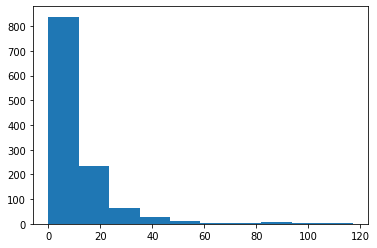

In [102]:
# Plot a histogram of the line lengths
plt.hist(line_num_words);

* 可以看到，絕大多數的台詞，都是 10 個字以內